In [1]:
import itertools
import sys, os

import numpy as np
import pandas as pd
from scipy.special import comb
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import statsmodels.api as sm

sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('poster')
sns.set_style('white')
#plt.rcParams["figure.dpi"] = 600
from sklearn.model_selection import train_test_split

In [2]:
corder = ['C1', 'C2', 'C3', 'C4', 'C0']

In [3]:
morder = ['MIN', 'OVERFLOW', 'MIXOTROPH', 'EXOENZYME', 'ROS',]
media_order = ['lowN', 'pro99']
mpalette = 'twilight'
sns.color_palette(mpalette, n_colors=5)

[(0.4828677867260272, 0.6304330455306234, 0.761915371498953),
 (0.3668108554010799, 0.26404857724525643, 0.6464799165290824),
 (0.18488035509396164, 0.07942573027972388, 0.21307651648984993),
 (0.5566322903496934, 0.17269677158182117, 0.31423043195101424),
 (0.775907907306857, 0.5355421788246119, 0.42413367909988375)]

In [4]:
gorder = [ 'Strong', 'Sustained', 'Weak', 'Inhibited','Axenic', 'Other']
gpalette = sns.color_palette('Set2', n_colors=4).as_hex() + ['black', 'lightgrey']
sns.color_palette(gpalette)

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.0, 0.0, 0.0),
 (0.8274509803921568, 0.8274509803921568, 0.8274509803921568)]

In [5]:
df_predicted_classes = pd.read_csv('monte_add_het_predicted_classes.csv.gz')

In [6]:
df_predicted_classes.columns
# ['run_id', 'y_pred', 'max_prob', 'idx', 'media', 'which', 'model','hash']

Index(['run_id', 'y_pred', 'max_prob', 'idx', 'media', 'which', 'model',
       'hash', 'VPRO', 'Unnamed: 0', 'Sample', 'full name', 'Group',
       'RMSE_Bptotal[N]', 'RMSE_Bptotal[C]', 'compare_points', 'RMSE',
       'RMSE_filled'],
      dtype='object')

In [7]:
df_predicted_classes.run_id.unique()

array(['monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZYME_C1_20_38_lowN_all_EXOENZYME_h8519271514136708373',
       'monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZYME_C1_22_48_lowN_all_EXOENZYME_h8519271514136708373',
       'monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZYME_C1_54_56_lowN_all_EXOENZYME_h8519271514136708373',
       ...,
       'monteadd_ROS_9_monte_vpro_19_33_ROS_C0_980_59_lowN_all_ROS_h-8660846992299669535',
       'monteadd_ROS_9_monte_vpro_19_33_ROS_C0_994_14_lowN_all_ROS_h-8660846992299669535',
       'monteadd_ROS_9_monte_vpro_19_33_ROS_C0_999_26_lowN_all_ROS_h-8660846992299669535'],
      dtype=object)

In [8]:
df = df_predicted_classes

In [9]:
df.columns

Index(['run_id', 'y_pred', 'max_prob', 'idx', 'media', 'which', 'model',
       'hash', 'VPRO', 'Unnamed: 0', 'Sample', 'full name', 'Group',
       'RMSE_Bptotal[N]', 'RMSE_Bptotal[C]', 'compare_points', 'RMSE',
       'RMSE_filled'],
      dtype='object')

In [10]:
df.head()

,run_id,y_pred,max_prob,idx,media,which,model,hash,VPRO,Unnamed: 0,Sample,full name,Group,RMSE_Bptotal[N],RMSE_Bptotal[C],compare_points,RMSE,RMSE_filled
0,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,Weak,0.989477,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,lowN,all,EXOENZYME,h8519271514136708373,vpro_11_62_EXOENZYME_C1_20,710504.0,10C0,Marinovum 5F3,Weak,5.205234,45.551143,74.0,237.104339,237.104339
1,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,Weak,0.989400,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,lowN,all,EXOENZYME,h8519271514136708373,vpro_11_62_EXOENZYME_C1_22,717797.0,10C0,Marinovum 5F3,Weak,4.224180,40.240316,74.0,169.982320,169.982320
2,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,Other,0.528581,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,lowN,all,EXOENZYME,h8519271514136708373,vpro_11_62_EXOENZYME_C1_54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
3,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,Axenic,0.624934,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,lowN,all,EXOENZYME,h8519271514136708373,vpro_11_62_EXOENZYME_C1_94,701930.0,1C0,Axenic,Axenic,4.316923,19.416927,74.0,83.821385,83.821385
4,monteadd2_EXOENZYME_13_monte_vpro_13_69_EXOENZ...,Axenic,0.968536,monteadd2_EXOENZYME_13_monte_vpro_13_69_EXOENZ...,lowN,all,EXOENZYME,h8519271514136708373,vpro_13_69_EXOENZYME_C1_28,711639.0,1A0,Axenic,Axenic,10.445065,72.373841,74.0,755.949501,755.949501


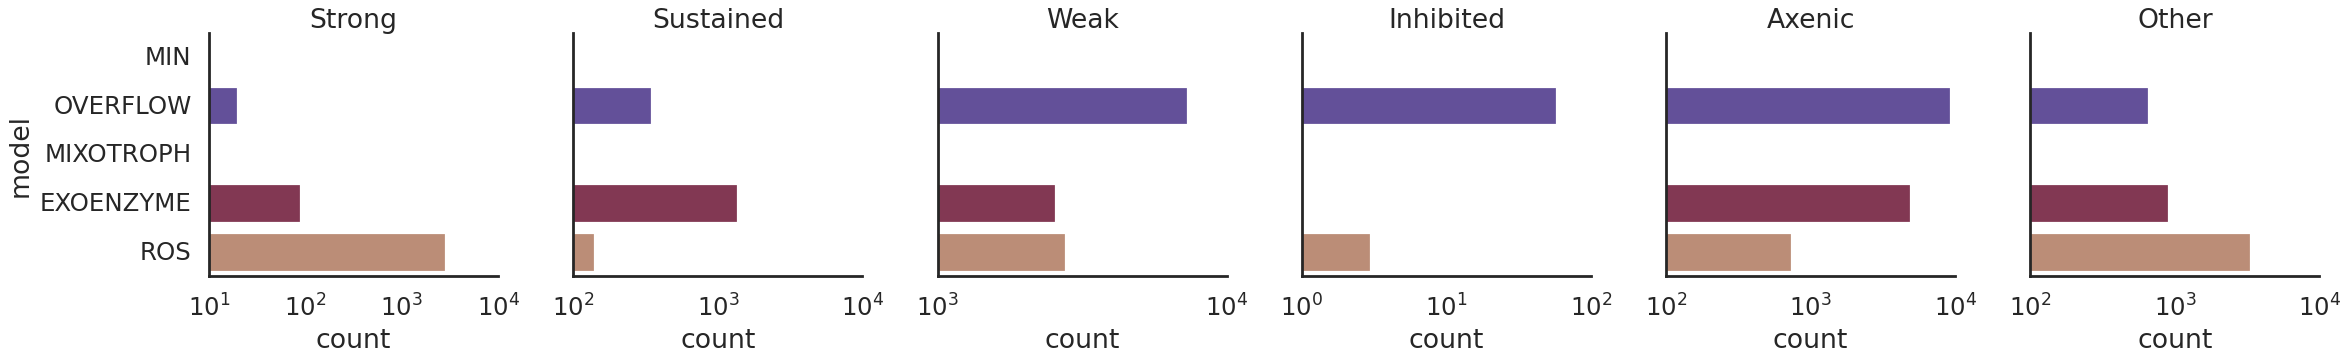

In [11]:
g = sns.catplot(
    data=df,
    y='model', order=morder, 
    col='y_pred', col_order=gorder,
    palette=mpalette, hue='model', hue_order=morder, dodge=False,
    kind='count',
    facet_kws=dict(sharex=False, margin_titles=True),
    sharex=False,
    #col_wrap=3,
    legend=False,
    #aspect=2,
)
g.set_titles(col_template='{col_name}', row_template='{row_name}')
g.set(xscale='log')
#g.set_xticklabels(rotation=30)

In [12]:
df.pivot_table(index='model', columns='y_pred', values='run_id', aggfunc='count', fill_value=0).reindex(index=morder, columns=gorder)

y_pred,Strong,Sustained,Weak,Inhibited,Axenic,Other
model,,,,,,
MIN,NaN,NaN,NaN,NaN,NaN,NaN
OVERFLOW,20.0,352.0,7360.0,58.0,9313.0,661.0
MIXOTROPH,NaN,NaN,NaN,NaN,NaN,NaN
EXOENZYME,90.0,1369.0,2568.0,1.0,4939.0,906.0
ROS,2866.0,140.0,2790.0,3.0,740.0,3341.0


In [13]:
df.groupby(['model', 'VPRO']).size().describe()

count    1070.000000
mean       35.062617
std        14.020258
min        14.000000
25%        27.000000
50%        31.000000
75%        36.750000
max        86.000000
dtype: float64

In [14]:
df.groupby(['model', 'VPRO']).y_pred.unique().str.join(',').reset_index().groupby(['model','y_pred']).size().tail(50)

model  y_pred                               
ROS    Other,Axenic,Sustained,Weak               1
       Other,Axenic,Weak                         7
       Other,Axenic,Weak,Strong                  1
       Other,Axenic,Weak,Strong,Sustained        1
       Other,Strong                              1
       Other,Strong,Axenic                       3
       Other,Strong,Axenic,Sustained,Weak        1
       Other,Strong,Axenic,Weak                  2
       Other,Strong,Axenic,Weak,Sustained        2
       Other,Strong,Sustained                    1
       Other,Strong,Sustained,Axenic             1
       Other,Strong,Sustained,Axenic,Weak        2
       Other,Strong,Sustained,Weak               5
       Other,Strong,Sustained,Weak,Axenic        2
       Other,Strong,Weak                         7
       Other,Strong,Weak,Axenic                  2
       Other,Strong,Weak,Sustained               4
       Other,Sustained,Strong,Axenic,Weak        2
       Other,Weak                    

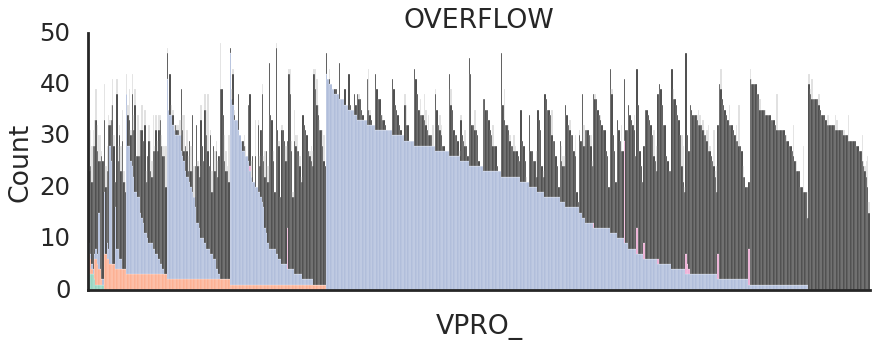

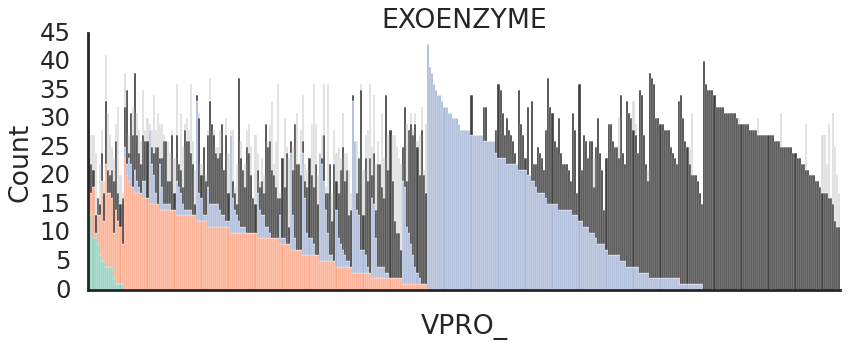

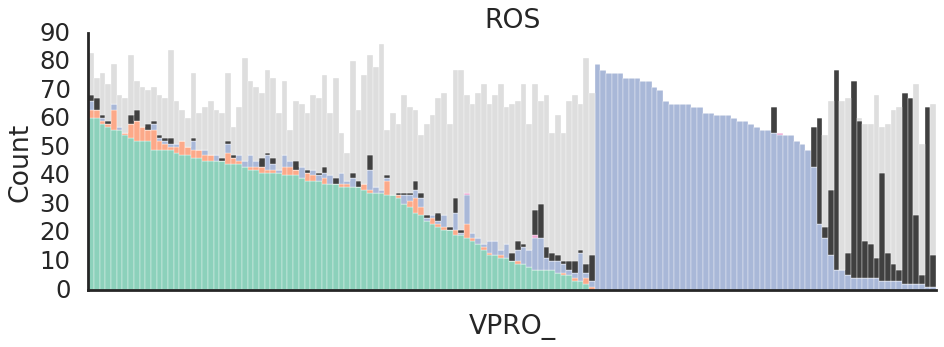

In [15]:
#fig, axs = plt.subplots(2, sharey=True, figsize=(10,5))
for i,m in enumerate(['OVERFLOW', 'EXOENZYME', 'ROS']):
        t = df.loc[
            df.model.isin([m]) #& df.VPRO_cluster.isin([c])
            #df.Group.isin(glist)
        ].copy()
        if t.shape[0]>0:
            tnumdf = t.pivot_table(
                index='VPRO', columns='y_pred', values='model', aggfunc='count', fill_value=0
            )
            #tnumdf = tnumdf.clip(lower=5)
            tnumdf = tnumdf.reindex(columns=gorder)
            tnumdf = tnumdf.sort_values(by=list(tnumdf.columns.to_list()), ascending=False)
            t['VPRO_'] = pd.Categorical(t['VPRO'], tnumdf.index)
            g = sns.displot(
                data=t, lw=0.3,
                hue='y_pred', x='VPRO_',  discrete=True, multiple='stack',
                #hue_order=[gorder[-1]] + gorder[:-1], palette=[gpalette[-1]] + gpalette[:-1],
                hue_order=reversed(gorder), palette=reversed(gpalette),
                #ax=axs[i], 
                aspect=3,
                legend=False,
                
                       )
#         axs[i].set_xticks([])
#         axs[i].set_yticks([0,200,400])
#         axs[i].set_xlabel('')
            plt.title(m)
#         sns.despine()
            g.set(xticklabels=[])

            #g.set_titles(col_template='{col_name}', row_template='{row_name}')
            #axs[i,j].set_title(f'{m} {c}')


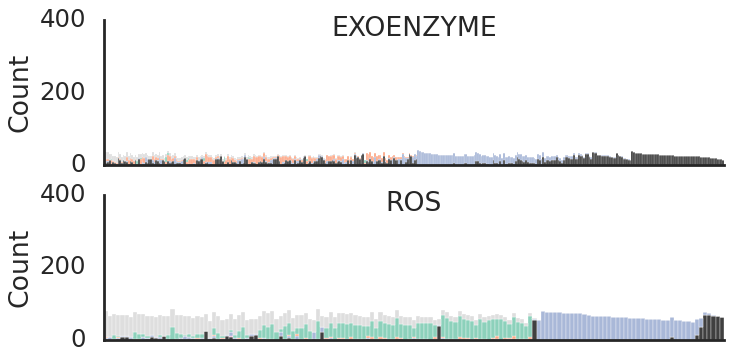

In [16]:
fig, axs = plt.subplots(2, sharey=True, figsize=(10,5))
for i,m in enumerate(['EXOENZYME', 'ROS']):
        t = df.loc[
            df.model.isin([m]) #& df.VPRO_cluster.isin([c])
            #df.Group.isin(glist)
        ].copy()
        if t.shape[0]>0:
            tnumdf = t.pivot_table(
                index='VPRO', columns='y_pred', values='model', aggfunc='count', fill_value=0
            ).reindex(columns=[ 'Axenic','Weak',  'Sustained','Strong',   'Inhibited','Other', ])
            #tnumdf['total'] = tnumdf.sum(axis=1)        
            tnumdf = tnumdf.sort_values(by=list(reversed(tnumdf.columns.to_list())))
            t['VPRO_'] = pd.Categorical(t['VPRO'], reversed(tnumdf.index))
            g = sns.histplot(
                data=t, lw=0.3,
                hue='y_pred', x='VPRO_',  discrete=True, multiple='stack',
                hue_order=[gorder[-1]] + gorder[:-1], palette=[gpalette[-1]] + gpalette[:-1],
                ax=axs[i], 
                #aspect=1,
                legend=False,
                       )
        axs[i].set_xticks([])
        axs[i].set_yticks([0,200,400])
        axs[i].set_xlabel('')
        axs[i].set_title(m, y=0.85)
        sns.despine()
            #g.set(xticklabels=[])
            #g.set_titles(col_template='{col_name}', row_template='{row_name}')
            #axs[i,j].set_title(f'{m} {c}')
plt.show()
